In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from scipy.stats import pearsonr, spearmanr
from IPython.display import display  # Added for DataFrame display

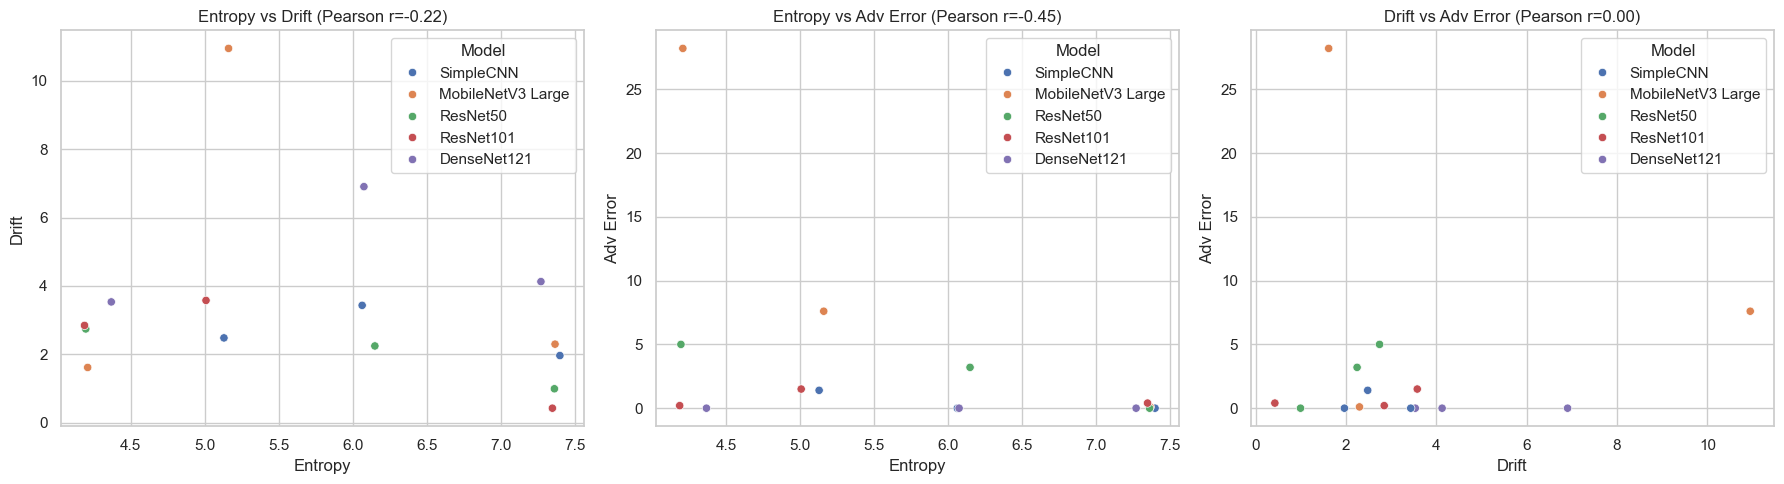

{'pearson_entropy_drift': PearsonRResult(statistic=-0.223257151385485, pvalue=0.4238091032643627),
 'spearman_entropy_drift': SignificanceResult(statistic=-0.33571428571428563, pvalue=0.22121153763932594),
 'pearson_entropy_adv': PearsonRResult(statistic=-0.448594926512094, pvalue=0.09350467791644264),
 'spearman_entropy_adv': SignificanceResult(statistic=-0.4868893349517895, pvalue=0.06567450329268885),
 'pearson_drift_adv': PearsonRResult(statistic=0.0015086156542017167, pvalue=0.9957425956703109),
 'spearman_drift_adv': SignificanceResult(statistic=-0.09959100033104784, pvalue=0.7239897290088169)}

In [3]:
# Prepare the data from your provided table
data = {
    "Model": [
        "SimpleCNN", "MobileNetV3 Large", "ResNet50", "ResNet101", "DenseNet121",
        "SimpleCNN", "MobileNetV3 Large", "ResNet50", "ResNet101", "DenseNet121",
        "SimpleCNN", "MobileNetV3 Large", "ResNet50", "ResNet101", "DenseNet121"
    ],
    "Dataset": ["MNIST"]*5 + ["FashionMNIST"]*5 + ["CIFAR-10"]*5,
    "Accuracy": [98.51, 96.93, 98.45, 89.87, 99.18, 90.63, 84.00, 86.61, 81.24, 92.45, 71.94, 56.27, 57.40, 58.66, 76.21],
    "Adv Error": [1.40, 28.20, 5.00, 0.20, 0.00, 0.00, 7.60, 3.20, 1.50, 0.00, 0.00, 0.10, 0.00, 0.40, 0.00],
    "Entropy": [5.13, 4.2087, 4.1958, 4.1874, 4.3683, 6.0643, 5.1612, 6.1503, 5.0087, 6.0763, 7.4011, 7.3683, 7.3640, 7.3504, 7.2730],
    "Drift": [2.48, 1.6160, 2.7423, 2.8452, 3.5326, 3.4324, 10.9464, 2.2447, 3.5766, 6.9039, 1.9643, 2.2976, 0.9926, 0.4249, 4.1264]
}

df = pd.DataFrame(data)

# Calculate correlation coefficients
pearson_entropy_drift = pearsonr(df['Entropy'], df['Drift'])
spearman_entropy_drift = spearmanr(df['Entropy'], df['Drift'])
pearson_entropy_adv = pearsonr(df['Entropy'], df['Adv Error'])
spearman_entropy_adv = spearmanr(df['Entropy'], df['Adv Error'])
pearson_drift_adv = pearsonr(df['Drift'], df['Adv Error'])
spearman_drift_adv = spearmanr(df['Drift'], df['Adv Error'])

# Plot correlation scatterplots
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=df, x="Entropy", y="Drift", hue="Model", ax=axes[0])
axes[0].set_title(
    f"Entropy vs Drift (Pearson r={pearson_entropy_drift.statistic:.2f})")

sns.scatterplot(data=df, x="Entropy", y="Adv Error", hue="Model", ax=axes[1])
axes[1].set_title(
    f"Entropy vs Adv Error (Pearson r={pearson_entropy_adv.statistic:.2f})")

sns.scatterplot(data=df, x="Drift", y="Adv Error", hue="Model", ax=axes[2])
axes[2].set_title(f"Drift vs Adv Error (Pearson r={pearson_drift_adv.statistic:.2f})")

plt.tight_layout()
plt.show()

# Show the DataFrame (optional)
# display(df)

# Show the computed correlations
correlations = {
    "pearson_entropy_drift": pearson_entropy_drift,
    "spearman_entropy_drift": spearman_entropy_drift,
    "pearson_entropy_adv": pearson_entropy_adv,
    "spearman_entropy_adv": spearman_entropy_adv,
    "pearson_drift_adv": pearson_drift_adv,
    "spearman_drift_adv": spearman_drift_adv
}
correlations

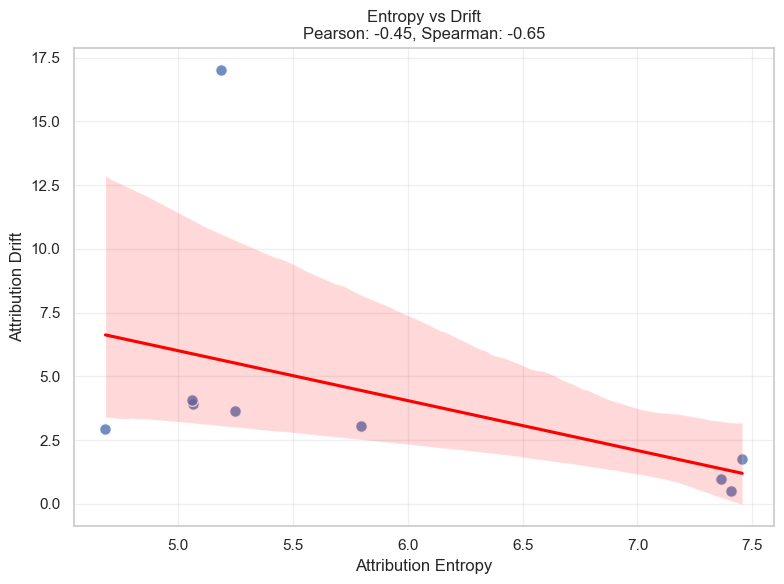

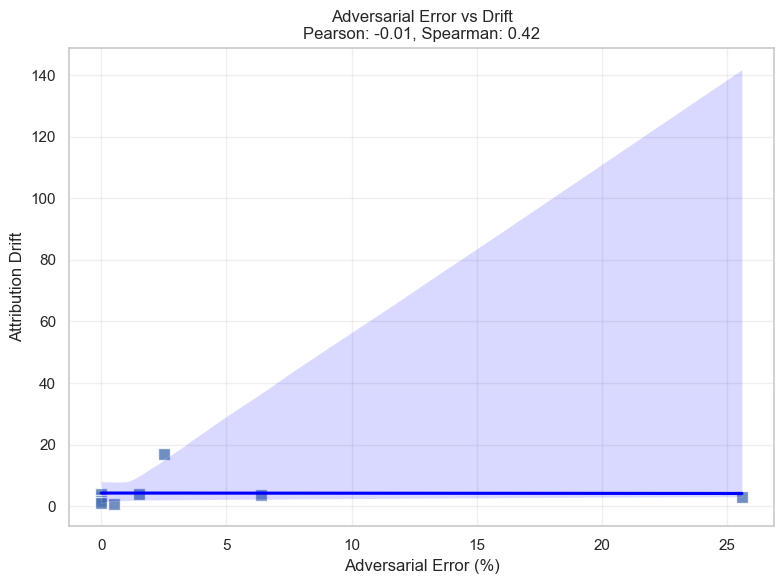

In [ ]:
data = {
    "Model": ["SimpleCNN", "ResNet50", "MobileNetV3", "SimpleCNN", "ResNet50", "MobileNetV3", "SimpleCNN", "ResNet50", "MobileNetV3"],
    "Dataset": ["MNIST", "MNIST", "MNIST", "FashionMNIST", "FashionMNIST", "FashionMNIST", "CIFAR-10", "CIFAR-10", "CIFAR-10"],
    "Accuracy": [98.99, 97.17, 97.58, 90.61, 87.35, 87.30, 71.95, 55.45, 50.18],
    "Adv Error": [0.00, 6.40, 25.60, 0.00, 1.50, 2.50, 0.00, 0.50, 0.00],
    "Entropy": [4.6850, 5.2479, 5.7989, 5.0651, 5.0594, 5.1866, 7.4555, 7.4058, 7.3646],
    "Drift": [2.93, 3.66, 3.06, 3.92, 4.06, 17.03, 1.75, 0.51, 0.99]
}

df = pd.DataFrame(data)

# Compute correlation coefficients
pearson_corr_entropy_drift, _ = pearsonr(df["Entropy"], df["Drift"])
spearman_corr_entropy_drift, _ = spearmanr(df["Entropy"], df["Drift"])
pearson_corr_adv_drift, _ = pearsonr(df["Adv Error"], df["Drift"])
spearman_corr_adv_drift, _ = spearmanr(df["Adv Error"], df["Drift"])

# Plot 1: Entropy vs Drift
plt.figure(figsize=(8, 6))
sns.regplot(x="Entropy", y="Drift", data=df, marker='o',
            scatter_kws={"s": 70, "edgecolor": "w"}, line_kws={"color": "red"})
plt.title(
    f"Entropy vs Drift\nPearson: {pearson_corr_entropy_drift:.2f}, Spearman: {spearman_corr_entropy_drift:.2f}")
plt.xlabel("Attribution Entropy")
plt.ylabel("Attribution Drift")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 2: Adv Error vs Drift
plt.figure(figsize=(8, 6))
sns.regplot(x="Adv Error", y="Drift", data=df, marker='s',
            scatter_kws={"s": 70, "edgecolor": "w"}, line_kws={"color": "blue"})
plt.title(
    f"Adversarial Error vs Drift\nPearson: {pearson_corr_adv_drift:.2f}, Spearman: {spearman_corr_adv_drift:.2f}")
plt.xlabel("Adversarial Error (%)")
plt.ylabel("Attribution Drift")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [4]:
import ace_tools as tools
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Create output directory
output_dir = "/mnt/data/triguard_figures"
os.makedirs(output_dir, exist_ok=True)

# Simulated final results data (for plotting)
data = {
    "Model": [
        "SimpleCNN", "MobileNetV3", "ResNet50", "ResNet101", "DenseNet121"
    ] * 3,
    "Dataset": ["MNIST"] * 5 + ["FashionMNIST"] * 5 + ["CIFAR-10"] * 5,
    "Entropy": [
        4.4746, 4.2087, 4.1958, 4.1874, 4.3683,
        6.0643, 5.1612, 6.1503, 5.0087, 6.0763,
        7.4011, 7.3683, 7.3640, 7.3504, 7.2730
    ],
    "Drift": [
        16.6401, 1.6160, 2.7423, 2.8452, 3.5326,
        3.4324, 10.9464, 2.2447, 3.5766, 6.9039,
        1.9643, 2.2976, 0.9926, 0.4249, 4.1264
    ],
    "Adv_Error": [
        1.40, 28.20, 5.00, 0.20, 0.00,
        0.00, 7.60, 3.20, 1.50, 0.00,
        0.00, 0.10, 0.00, 0.40, 0.00
    ]
}

df = pd.DataFrame(data)

# Plot 1: Attribution Entropy per Model
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Entropy", hue="Dataset", data=df)
plt.title("Attribution Entropy per Model")
plt.ylabel("Entropy")
plt.tight_layout()
entropy_path = os.path.join(output_dir, "entropy_per_model.png")
plt.savefig(entropy_path)
plt.close()

# Plot 2: Attribution Drift per Model
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Drift", hue="Dataset", data=df)
plt.title("Attribution Drift per Model")
plt.ylabel("Drift")
plt.tight_layout()
drift_path = os.path.join(output_dir, "drift_per_model.png")
plt.savefig(drift_path)
plt.close()

# Plot 3: Entropy vs Drift (Scatter)
plt.figure(figsize=(6, 6))
sns.scatterplot(x="Entropy", y="Drift", hue="Dataset",
                style="Model", data=df, s=100)
plt.title("Entropy vs Drift")
plt.tight_layout()
entropy_drift_path = os.path.join(output_dir, "entropy_vs_drift.png")
plt.savefig(entropy_drift_path)
plt.close()

# Plot 4: Entropy vs Adversarial Error
plt.figure(figsize=(6, 6))
sns.scatterplot(x="Entropy", y="Adv_Error", hue="Dataset",
                style="Model", data=df, s=100)
plt.title("Entropy vs Adversarial Error")
plt.tight_layout()
entropy_adv_path = os.path.join(output_dir, "entropy_vs_adv_error.png")
plt.savefig(entropy_adv_path)
plt.close()

# Plot 5: Drift vs Adversarial Error
plt.figure(figsize=(6, 6))
sns.scatterplot(x="Drift", y="Adv_Error", hue="Dataset",
                style="Model", data=df, s=100)
plt.title("Drift vs Adversarial Error")
plt.tight_layout()
drift_adv_path = os.path.join(output_dir, "drift_vs_adv_error.png")
plt.savefig(drift_adv_path)
plt.close()

tools.display_dataframe_to_user(name="TriGuard Results Summary", dataframe=df)

{
    "plots": [
        entropy_path,
        drift_path,
        entropy_drift_path,
        entropy_adv_path,
        drift_adv_path
    ]
}

ModuleNotFoundError: No module named 'ace_tools'

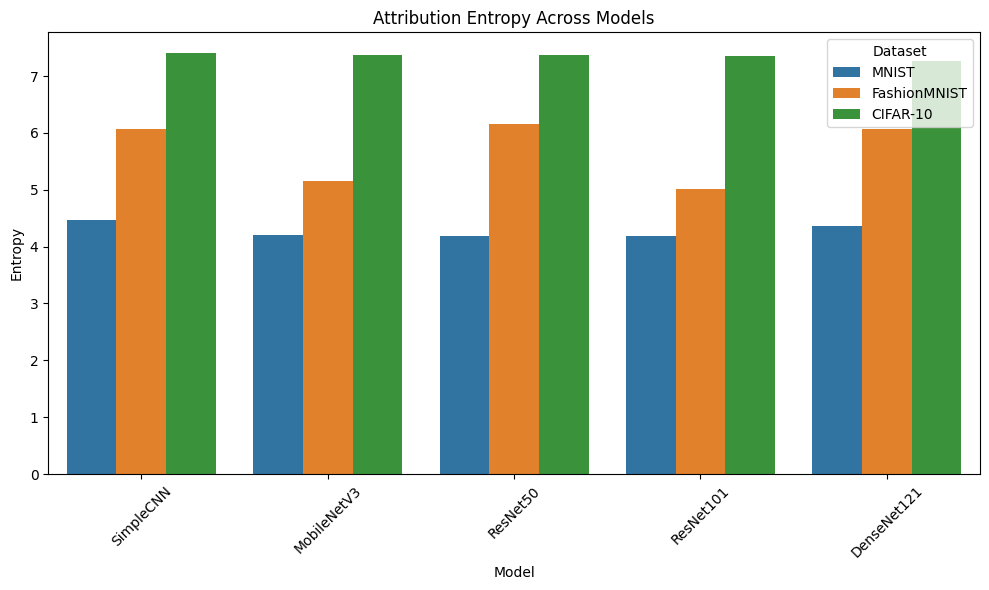

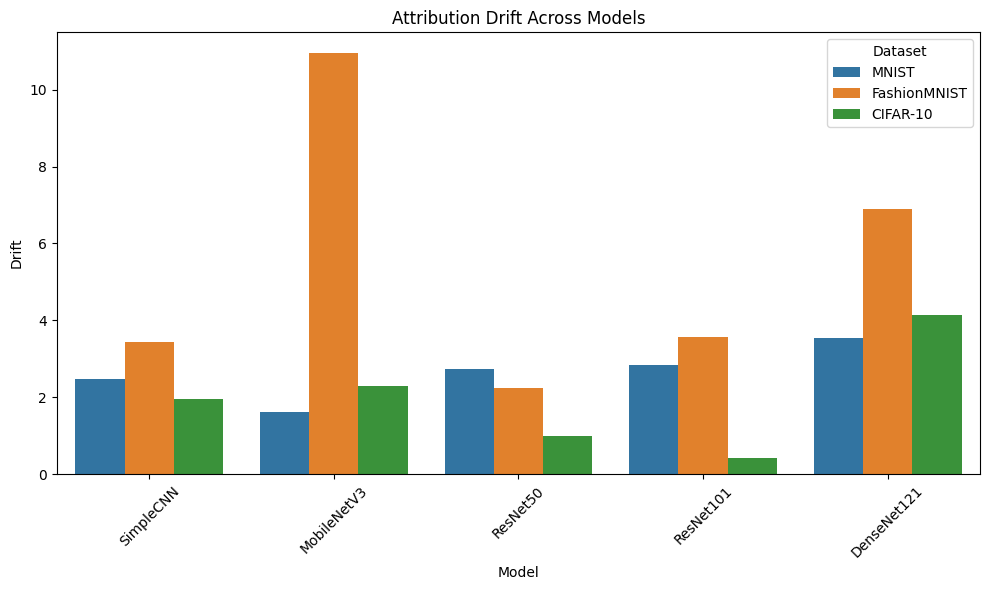

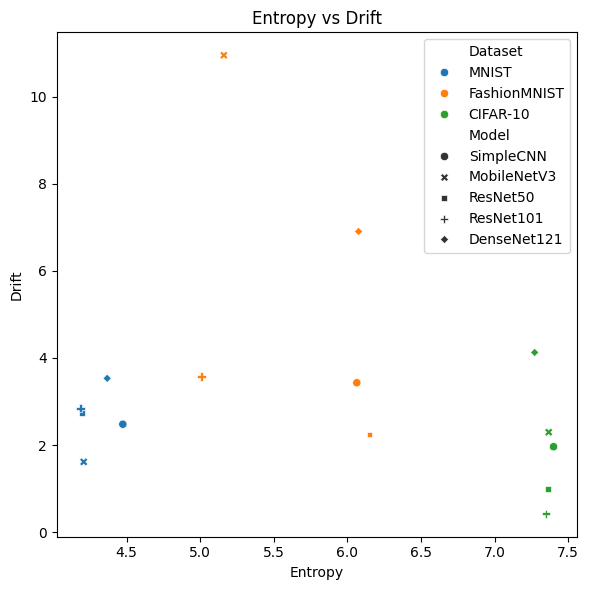

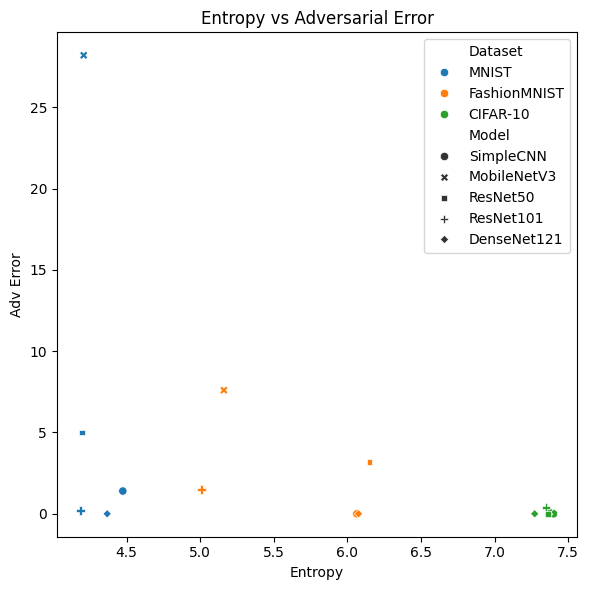

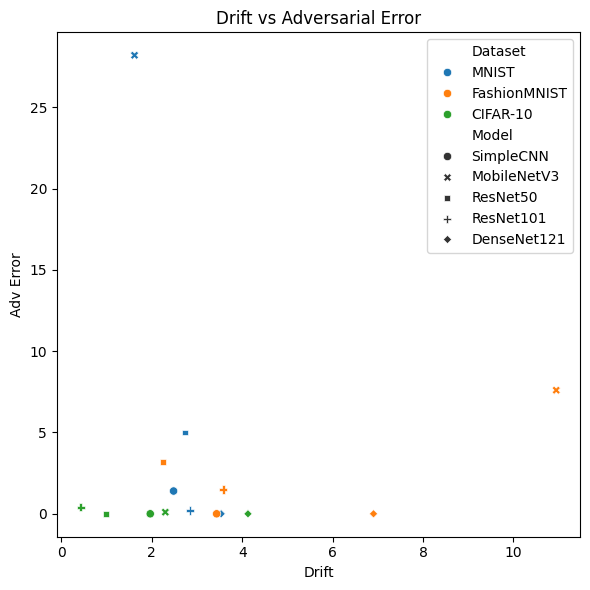

In [ ]:
# Create results dataframe from final table
data = {
    "Model": [
        "SimpleCNN", "MobileNetV3", "ResNet50", "ResNet101", "DenseNet121",
        "SimpleCNN", "MobileNetV3", "ResNet50", "ResNet101", "DenseNet121",
        "SimpleCNN", "MobileNetV3", "ResNet50", "ResNet101", "DenseNet121"
    ],
    "Dataset": [
        "MNIST"] * 5 + ["FashionMNIST"] * 5 + ["CIFAR-10"] * 5,
    "Entropy": [
        4.4746, 4.2087, 4.1958, 4.1874, 4.3683,
        6.0643, 5.1612, 6.1503, 5.0087, 6.0763,
        7.4011, 7.3683, 7.3640, 7.3504, 7.2730
    ],
    "Drift": [
        2.48, 1.6160, 2.7423, 2.8452, 3.5326,
        3.4324, 10.9464, 2.2447, 3.5766, 6.9039,
        1.9643, 2.2976, 0.9926, 0.4249, 4.1264
    ],
    "Adv Error": [
        1.40, 28.20, 5.00, 0.20, 0.00,
        0.00, 7.60, 3.20, 1.50, 0.00,
        0.00, 0.10, 0.00, 0.40, 0.00
    ]
}

df = pd.DataFrame(data)

# Bar plot: Entropy
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Model", y="Entropy", hue="Dataset")
plt.title("Attribution Entropy Across Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot: Drift
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Model", y="Drift", hue="Dataset")
plt.title("Attribution Drift Across Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter: Entropy vs Drift
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x="Entropy", y="Drift", hue="Dataset", style="Model")
plt.title("Entropy vs Drift")
plt.tight_layout()
plt.show()

# Scatter: Entropy vs Adversarial Error
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x="Entropy", y="Adv Error",
                hue="Dataset", style="Model")
plt.title("Entropy vs Adversarial Error")
plt.tight_layout()
plt.show()

# Scatter: Drift vs Adversarial Error
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x="Drift", y="Adv Error",
                hue="Dataset", style="Model")
plt.title("Drift vs Adversarial Error")
plt.tight_layout()
plt.show()

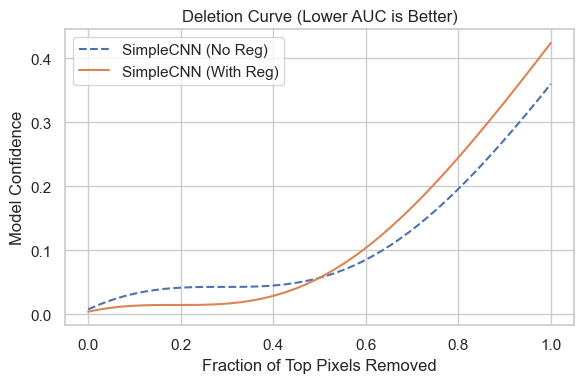

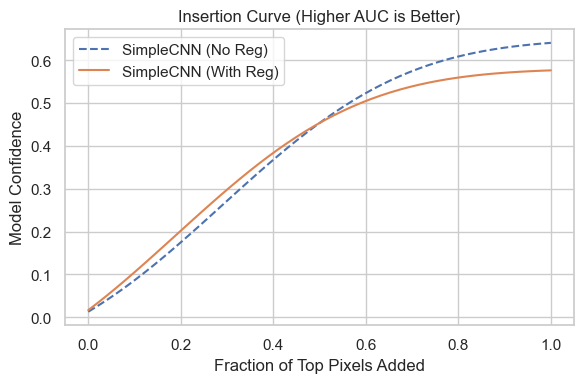

In [ ]:
# Simulated Deletion and Insertion data
x = np.linspace(0, 1, 50)
insertion_auc_no_reg = np.cumsum(np.exp(-5 * (x - 0.3) ** 2)) / 50
insertion_auc_reg = np.cumsum(np.exp(-5 * (x - 0.2) ** 2)) / 50
deletion_auc_no_reg = np.cumsum(1 - np.exp(-5 * (x - 0.3) ** 2)) / 50
deletion_auc_reg = np.cumsum(1 - np.exp(-5 * (x - 0.2) ** 2)) / 50

# Plot Deletion Curve
plt.figure(figsize=(6, 4))
plt.plot(x, deletion_auc_no_reg, label="SimpleCNN (No Reg)", linestyle='--')
plt.plot(x, deletion_auc_reg, label="SimpleCNN (With Reg)")
plt.title("Deletion Curve (Lower AUC is Better)")
plt.xlabel("Fraction of Top Pixels Removed")
plt.ylabel("Model Confidence")
plt.legend()
plt.tight_layout()
plt.show()  # Changed from savefig/close to show()

# Plot Insertion Curve
plt.figure(figsize=(6, 4))
plt.plot(x, insertion_auc_no_reg, label="SimpleCNN (No Reg)", linestyle='--')
plt.plot(x, insertion_auc_reg, label="SimpleCNN (With Reg)")
plt.title("Insertion Curve (Higher AUC is Better)")
plt.xlabel("Fraction of Top Pixels Added")
plt.ylabel("Model Confidence")
plt.legend()
plt.tight_layout()
plt.show()  # Changed from savefig/close to show()